<a href="https://colab.research.google.com/github/ali-workshop/Quantum-Assisted-Advancements-in-Machine-Learning-for-Enhanced-Accuracy-until-0.9459459-/blob/main/Quantum_Assisted_Advancements_in_Machine_Learning_for_Enhanced_Accuracy_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum machine learning (QML)
Quantum machine learning (QML) represents a groundbreaking fusion of quantum computing and classical machine learning techniques, promising to revolutionize various fields, from cryptography to optimization and artificial intelligence.
Quantum computing leverages the principles of quantum mechanics to perform computations that classical computers struggle with. QML models harness these quantum phenomena to enhance classical machine learning algorithms.
Key QML algorithms include quantum support vector machines, quantum neural networks, and quantum annealers. These models address complex optimization problems, classification tasks, and unsupervised learning, respectively. They exhibit remarkable capabilities, such as faster solutions to certain optimization tasks and potential advantages in learning complex data patterns.


#download important libraries

In [ ]:
!pip install qiskit-machine-learning
!pip install qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.2 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512381 sha256=98f281b0e52639194788a07a126521ad6b2f7f808a07d674bd1ddfe66e5cf08e
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3ac

#Import the necessary libraries

In [ ]:
# Data manipulation libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations and arrays

# Machine learning and data preprocessing libraries
from sklearn.preprocessing import OneHotEncoder   # For one-hot encoding categorical data
from sklearn import preprocessing   # For data preprocessing and scaling
from sklearn.metrics import confusion_matrix   # For calculating confusion matrices
from sklearn import svm   # For Support Vector Machine (SVM) implementation

# Visualization libraries
import itertools   # For creating iterators for efficient looping
import matplotlib.pyplot as plt   # For creating visualizations
import matplotlib.mlab as mlab
import seaborn   # For enhancing the aesthetics of visualizations

# Quantum computing libraries
from qiskit_machine_learning.algorithms import QSVC   # Quantum Support Vector Classifier
from qiskit import BasicAer   # For setting up basic quantum simulators
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap   # Quantum feature maps
from qiskit.primitives import Sampler   # For creating quantum samplers
from qiskit_machine_learning.kernels import FidelityQuantumKernel   # Quantum kernel
from qiskit.algorithms.state_fidelities import ComputeUncompute   # Quantum state fidelity calculation
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC   # Quantum classifiers
from IPython.display import clear_output   # For clearing the output in Jupyter Notebook
from qiskit import QuantumCircuit   # Quantum circuit construction
from qiskit.circuit import Parameter   # Parameter for quantum circuit
from qiskit.circuit.library import RealAmplitudes   # Quantum circuit library for real amplitudes
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B   # Optimization algorithms
from qiskit_algorithms.utils import algorithm_globals   # Algorithm global settings

# Set a random seed for reproducibility
algorithm_globals.random_seed = 42

# Define the dimension for your application
dimension = 2

# Enable inline plotting for visualizations in Jupyter Notebook
%matplotlib inline


#read the dataset

In [ ]:
 data= pd.read_csv('/content/creditcardfraud/creditcard.csv') # Reading the file .csv

#plot the data

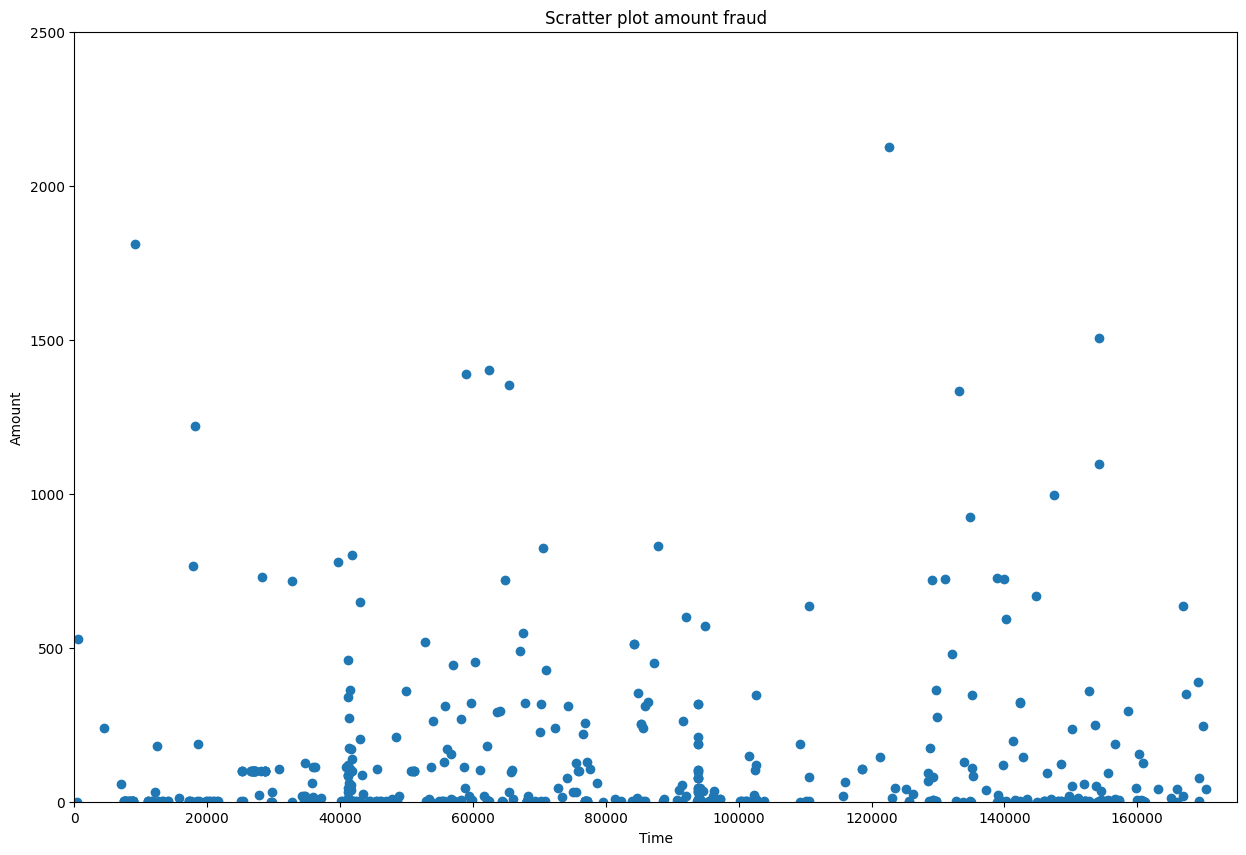

In [ ]:
df_fraud = data[data['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

#Explore the data

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then may be  : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


#Calculating the correlation between data columns

In [ ]:
df_corr = data.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

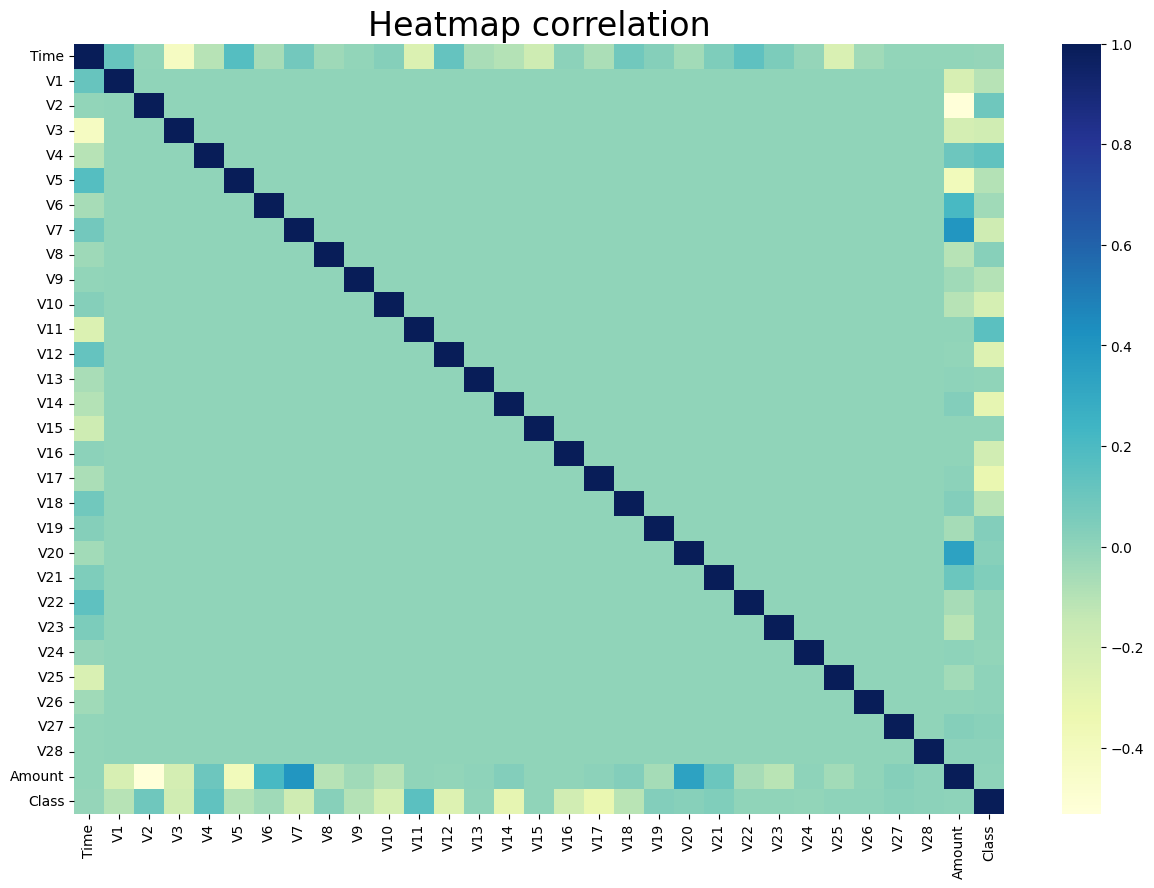

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

#Start preprocessing

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [ ]:
df_train_all = data[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


<ipython-input-12-50fc4b8ee724>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.


#After processing the data, we keep the processed data in a CSV file

In [ ]:
# Specify the path and filename for the CSV file
csv_filename = 'preprocessed_data.csv'

# Save the DataFrame to a CSV file
df_train.to_csv(csv_filename, index=False)  # Set index=False to exclude the DataFrame's index in the CSV file


# Now we can directly read the previously processed data without having to do the processing again

In [ ]:
df_train=pd.read_csv("/content/preprocessed_data.csv")

#Now we choose a subset of the data because of the length of time the quantum model needs to train

In [ ]:
sub_df_train=df_train[300:]

#now define the features and the targets

In [ ]:
X_train = sub_df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = sub_df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

#Now we build an additional processing function in order to prepare the data for the quantum model

In [ ]:
def prepare_Data(data,target, n=2, PLOT_DATA=True):

    # sample_train is of the same form as data
    sample_train, sample_test, label_train, label_test = train_test_split(
        data, target,test_size=0.25, train_size=0.75,random_state=22)


    # Now we standarize for gaussian around 0 with unit variance
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)


    # Now reduce number of features to number of qubits
    pca = PCA(n_components=n).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)



    # Samples are pairs of points
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((0, 4)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)



    if PLOT_DATA:
        for k in range(0, 9):
            plt.scatter(sample_train[label_train == k, 0][:],
                        sample_train[label_train == k, 1][:])

        plt.title("PCA dim. reduced  dataset")
        plt.show()

    return sample_train,sample_test,label_train,label_test

#we call this function

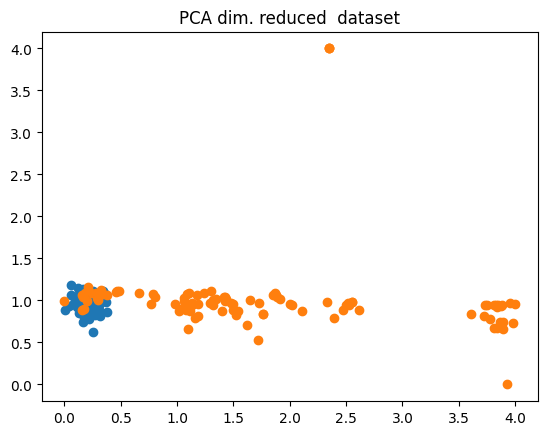

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

sample_train,sample_test,label_train,label_test=prepare_Data(X_train, y_train,  n=2, PLOT_DATA=True)

In [ ]:
#check for the data shape
print(sample_train.shape)
print(sample_test.shape)
print(label_train.shape)
print(label_test.shape)

(219, 2)
(74, 2)
(219,)
(74,)


#Now build the first quantum model

In [ ]:
feature_map = PauliFeatureMap(feature_dimension=dimension, reps=2, paulis=['Y','YY','Z','ZZ'])
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
qsvc = QSVC(quantum_kernel=kernel)

In [ ]:
#start trianing
qsvc.fit(sample_train,label_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7d6425959060>,
     random_state=42, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#calc the accuracy
qsvc_score = qsvc.score(sample_test,label_test)

print(f"QSVC classification TEst score: {qsvc_score}")

QSVC classification TEst score: 0.9459459459459459


#Model evaluation

In [ ]:
predictions= qsvc.predict(sample_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision and recall
precision = precision_score(label_test, predictions)
recall = recall_score(label_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Precision: 0.95
Recall: 0.95


#Now build the second quantum model

In [ ]:

feature_map = ZZFeatureMap(feature_dimension=dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
qsvc1 = QSVC(quantum_kernel=kernel)


In [ ]:
qsvc1.fit(sample_train, label_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7d64257d7c70>,
     random_state=42, shrinking=True, tol=0.001, verbose=False)

In [ ]:
qsvc_score1 = qsvc1.score(sample_test,label_test)

print(f"QSVC classification TEst score: {qsvc_score1}")

QSVC classification TEst score: 0.9324324324324325


#eval the model

In [ ]:
predictions1= qsvc1.predict(sample_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(label_test, predictions1)
recall = recall_score(label_test, predictions1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.97
Recall: 0.90


#Now build the third quantum model

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(2)
ansatz = RealAmplitudes(2, reps=1)

# construct variational quantum classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=COBYLA(maxiter=100),
    callback=callback_graph,)

#reshape the label_train and the label_test

In [ ]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')
# Fit and transform the binary vector
label_train = encoder.fit_transform(np.array(label_train).reshape(-1, 1))

label_test = encoder.fit_transform(np.array(label_test).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#fit classifier to data

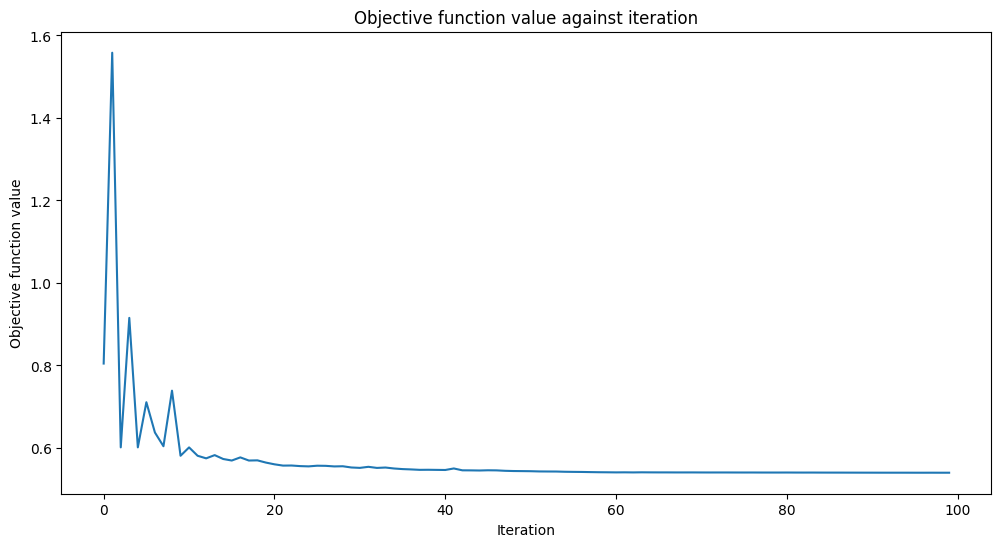

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
vqc.fit(sample_train,label_train)
# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)



# score classifier

In [ ]:
vqc.score(sample_test,label_test)

0.918918918918919

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Quantum_Assisted_Advancements_in_Machine_Learning_for_Enhanced_Accuracy_F.ipynb

[NbConvertApp] Converting notebook /content/Quantum_Assisted_Advancements_in_Machine_Learning_for_Enhanced_Accuracy_F.ipynb to html
[NbConvertApp] Writing 866908 bytes to /content/Quantum_Assisted_Advancements_in_Machine_Learning_for_Enhanced_Accuracy_F.html
